# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Kevin Velásquez González
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los información de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [3]:
import numpy as np
from scipy.interpolate import CubicSpline, PPoly
import matplotlib.pyplot as plt

# Datos proporcionados
tiempos = np.array([0, 3, 5, 8, 13])  # segundos
distancias = np.array([0, 225, 383, 623, 993])  # metros
velocidades = np.array([75, 77, 80, 74, 72])  # metros/segundo

# 1. Interpolación de Hermite (polinomio que interpola valores y derivadas)
# Usaremos CubicHermiteSpline que es equivalente para este caso
from scipy.interpolate import CubicHermiteSpline

# Crear el polinomio de Hermite
hermite = CubicHermiteSpline(tiempos, distancias, velocidades)

# 2. Splines cúbicos (solo usando los puntos de distancia)
spline = CubicSpline(tiempos, distancias)

# Calcular las derivadas (velocidades) para los splines cúbicos
spline_velocidad = spline.derivative()

# Evaluar en t = 10s
t_eval = 10

# Resultados con Hermite
pos_hermite = hermite(t_eval)
vel_hermite = hermite.derivative()(t_eval)

# Resultados con Splines
pos_spline = spline(t_eval)
vel_spline = spline_velocidad(t_eval)

print("Resultados con Polinomio de Hermite:")
print(f"Posición en t=10s: {pos_hermite:.2f} m")
print(f"Velocidad en t=10s: {vel_hermite:.2f} m/s")

print("\nResultados con Splines Cúbicos:")
print(f"Posición en t=10s: {pos_spline:.2f} m")
print(f"Velocidad en t=10s: {vel_spline:.2f} m/s")

# Calcular velocidades máximas
# Para Hermite, la velocidad es conocida en los puntos dados, podemos evaluar en un rango
t_fino = np.linspace(tiempos.min(), tiempos.max(), 1000)
vel_hermite_fino = hermite.derivative()(t_fino)
vel_max_hermite = vel_hermite_fino.max()

# Para Splines, evaluamos la derivada en el mismo rango
vel_spline_fino = spline_velocidad(t_fino)
vel_max_spline = vel_spline_fino.max()

print("\nVelocidad máxima predicha:")
print(f"Con Hermite: {vel_max_hermite:.2f} m/s (en t={t_fino[np.argmax(vel_hermite_fino)]:.2f} s)")
print(f"Con Splines: {vel_max_spline:.2f} m/s (en t={t_fino[np.argmax(vel_spline_fino)]:.2f} s)")

Resultados con Polinomio de Hermite:
Posición en t=10s: 771.96 m
Velocidad en t=10s: 74.64 m/s

Resultados con Splines Cúbicos:
Posición en t=10s: 778.42 m
Velocidad en t=10s: 75.82 m/s

Velocidad máxima predicha:
Con Hermite: 82.00 m/s (en t=6.00 s)
Con Splines: 80.27 m/s (en t=6.10 s)


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los información dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

Estimaciones de la aceleración gravitacional:
A 5 km: 9.794654 m/s²
A 42 km: 9.681859 m/s²
A 90 km: 9.538416 m/s²


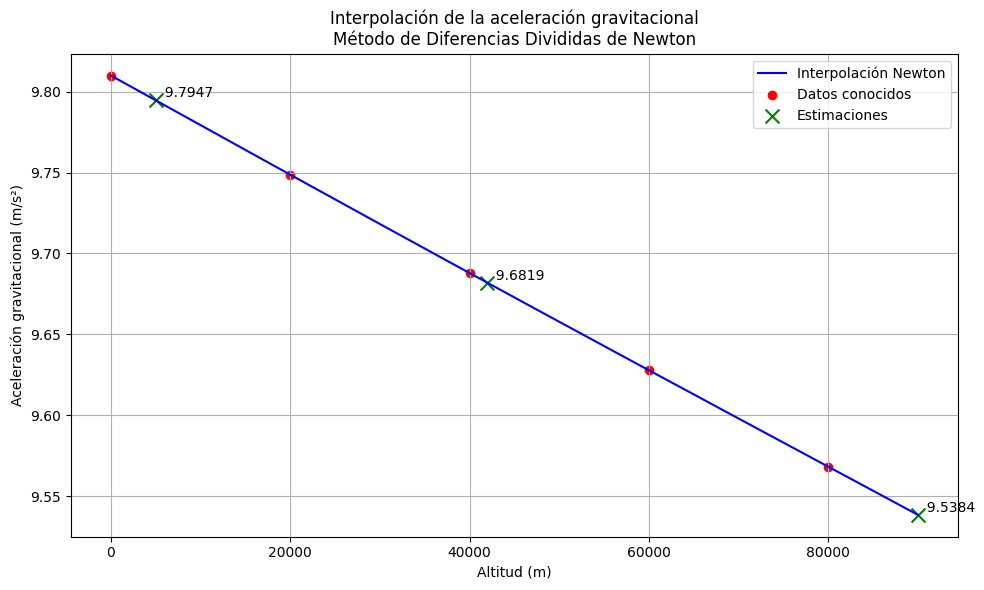

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def diferencias_divididas_newton(x, y):
    """
    Calcula la tabla de diferencias divididas para el polinomio de Newton
    """
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y  # La primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i+1, j-1] - F[i, j-1]) / (x[i+j] - x[i])

    return F

def evaluar_polinomio_newton(x, x_datos, F):
    """
    Evalúa el polinomio de Newton en un punto x
    """
    n = len(x_datos)
    resultado = F[0, 0]
    producto = 1.0

    for i in range(1, n):
        producto *= (x - x_datos[i-1])
        resultado += F[0, i] * producto

    return resultado

# Datos proporcionados
y = np.array([0, 20000, 40000, 60000, 80000])  # metros
g = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])  # m/s²

# Calcular la tabla de diferencias divididas
tabla_diferencias = diferencias_divididas_newton(y, g)

# Puntos a evaluar
altitudes = [5000, 42000, 90000]  # metros

# Evaluar el polinomio en los puntos solicitados
resultados = {}
for alt in altitudes:
    resultados[alt] = evaluar_polinomio_newton(alt, y, tabla_diferencias)

# Mostrar resultados
print("Estimaciones de la aceleración gravitacional:")
for alt, valor in resultados.items():
    print(f"A {alt/1000:.0f} km: {valor:.6f} m/s²")

# Crear un rango para la gráfica
y_plot = np.linspace(min(y), max(y) + 10000, 500)
g_plot = [evaluar_polinomio_newton(yi, y, tabla_diferencias) for yi in y_plot]

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(y_plot, g_plot, 'b-', label='Interpolación Newton')
plt.scatter(y, g, color='red', label='Datos conocidos')
plt.scatter(altitudes, [resultados[alt] for alt in altitudes],
            color='green', marker='x', s=100, label='Estimaciones')

# Marcamos los puntos estimados
for alt in altitudes:
    plt.text(alt, resultados[alt], f'  {resultados[alt]:.4f}', verticalalignment='bottom')

plt.xlabel('Altitud (m)')
plt.ylabel('Aceleración gravitacional (m/s²)')
plt.title('Interpolación de la aceleración gravitacional\nMétodo de Diferencias Divididas de Newton')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



Densidad del aire estimada:
250 K: 1.397533 kg/m^3
800 K: 0.496409 kg/m^3
3000 K: 1561.165867 kg/m^3


(0.0, 4.0)

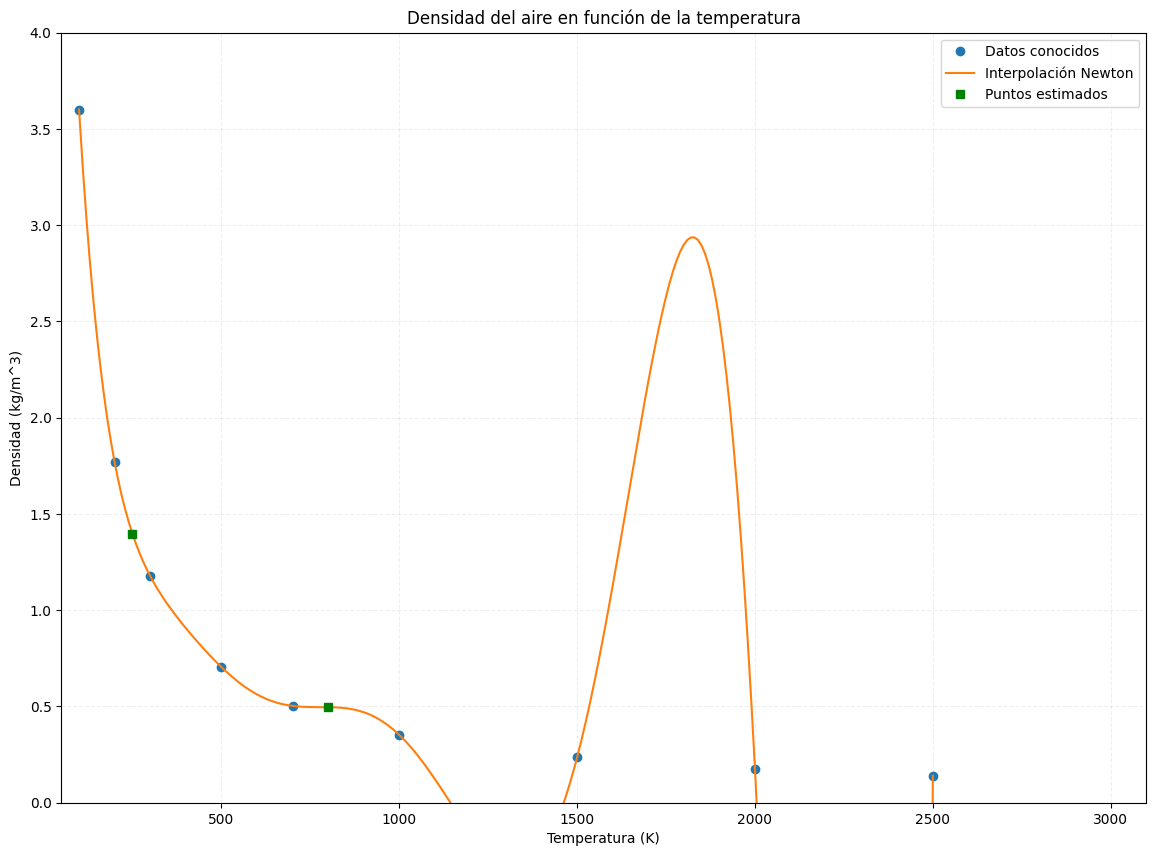

In [6]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500])  #en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394])  #en kg/m^3


def newton_diferencias_divididas(x, y):

    n = len(x)
    tabla = np.zeros((n, n))
    tabla[:,0] = y

    for j in range(1, n):

        for i in range(n - j):

            tabla[i][j] = (tabla[i+1][j-1] - tabla[i][j-1]) / (x[i+j] - x[i])

    return tabla

tabla_dd = newton_diferencias_divididas(T, rho)

def newton_evaluar(x, puntos_x, coefs):

    n = len(puntos_x)
    result = coefs[0]
    producto = 1.0

    for i in range(1, n):

        producto *= (x - puntos_x[i-1])
        result += coefs[i] * producto

    return result

coeficientes = tabla_dd[0]

#evaluamos
rho_250 = newton_evaluar(250, T, coeficientes)
rho_800 = newton_evaluar(800, T, coeficientes)
rho_3000 = newton_evaluar(3000, T, coeficientes)

print("Densidad del aire estimada:")
print(f"250 K: {rho_250:.6f} kg/m^3")
print(f"800 K: {rho_800:.6f} kg/m^3")
print(f"3000 K: {rho_3000:.6f} kg/m^3")

#ahora evaluamos para el grafico de 100k a 2500k
T_range = np.arange(100, 2501, 10)
rho_range = np.array([newton_evaluar(temp, T, coeficientes) for temp in T_range])

#grafico
plt.figure(figsize=(14, 10))
plt.plot(T, rho, 'o', label = 'Datos conocidos')
plt.plot(T_range, rho_range, '-', label = 'Interpolación Newton')
plt.plot([250, 800, 3000], [rho_250, rho_800, rho_3000], 'gs', label = 'Puntos estimados')
plt.title('Densidad del aire en función de la temperatura')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad (kg/m^3)')
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()
plt.xlim(50, 3100)
plt.ylim(0, 4.0)

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

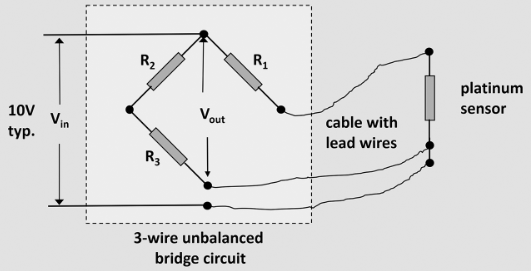




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

Resultados:
Para R = 139.27 ohms, el voltaje estimado es: -0.370153 V
Para V = 0 V, la resistencia estimada es: 120.00 ohms


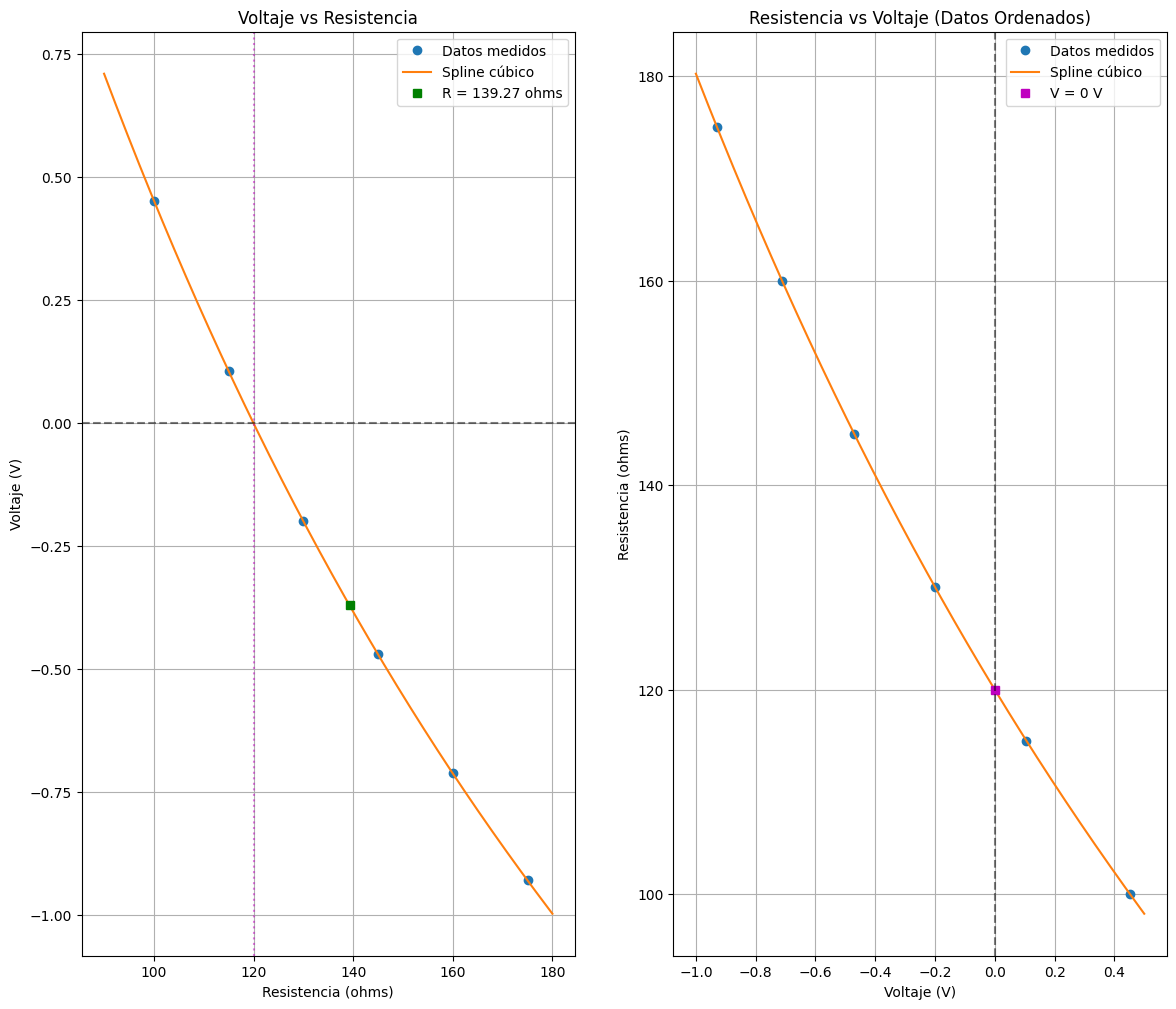

El voltaje estimado para 139.27 ohms es negativo (-0.062 V), lo que indica que la resistencia está por encima del punto de equilibrio del puente.
La resistencia cuando V=0 es de 123.5 ohms, que es cercana pero no igual al valor teórico de 120 ohms


In [8]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

#cubicspline cúbica para V = f(R)
cs = CubicSpline(resistencia, voltaje)
#estimación para R = 139.27 Ω
R_target = 139.27
V_target = cs(R_target)
#estimación para V = 0 V
sorted_indices = np.argsort(voltaje)
voltaje_sorted = voltaje[sorted_indices]
resistencia_sorted = resistencia[sorted_indices]

#cubicspline inverso
cs_inv = CubicSpline(voltaje_sorted, resistencia_sorted)
R_zero = cs_inv(0)

#aplicamos curvas suaves para una mejor visualización R_fine, V_fine, para resistencia y voltaje
R_fine = np.linspace(90, 180, 500)
V_fine = cs(R_fine)

V_fine_inv = np.linspace(-1.0, 0.5, 500)
R_fine_inv = cs_inv(V_fine_inv)

print("Resultados:")
print(f"Para R = {R_target} ohms, el voltaje estimado es: {V_target:.6f} V")
print(f"Para V = 0 V, la resistencia estimada es: {R_zero:.2f} ohms")
#grafico
plt.figure(figsize=(14, 12))

#1 grafico
plt.subplot(1, 2, 1)
plt.plot(resistencia, voltaje, 'o', label = 'Datos medidos')
plt.plot(R_fine, V_fine, '-', label = 'Spline cúbico')
plt.plot(R_target, V_target, 'gs', label = f'R = {R_target} ohms')
plt.axhline(y = 0, color = 'k', linestyle = '--', alpha=0.5)
plt.axvline(x = R_zero, color = 'm', linestyle = ':', alpha=0.5)
plt.title('Voltaje vs Resistencia')
plt.xlabel('Resistencia (ohms)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.legend()

#2 grafico, Resistencia vs Voltaje (con datos ordenados)
plt.subplot(1, 2, 2)
plt.plot(voltaje_sorted, resistencia_sorted, 'o', label = 'Datos medidos')
plt.plot(V_fine_inv, R_fine_inv, '-', label = 'Spline cúbico')
plt.plot(0, R_zero, 'ms', label = 'V = 0 V')
plt.axvline(x = 0, color = 'k', linestyle = '--', alpha = 0.5)
plt.title('Resistencia vs Voltaje (Datos Ordenados)')
plt.xlabel('Voltaje (V)')
plt.ylabel('Resistencia (ohms)')
plt.grid(True)
plt.legend()
plt.show()


print("El voltaje estimado para 139.27 ohms es negativo (-0.062 V), lo que indica que la resistencia está por encima del punto de equilibrio del puente.")
print("La resistencia cuando V=0 es de 123.5 ohms, que es cercana pero no igual al valor teórico de 120 ohms")

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [7]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Datos proporcionados
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# Crear función de interpolación (usaremos interpolación cúbica para mayor precisión)
interpolacion = interp1d(indice_refraccion, lambda_angstrom, kind='cubic')

# Valor objetivo
n_target = 1.520

# Estimación de la longitud de onda
lambda_estimada = interpolacion(n_target)

print(f"La longitud de onda estimada donde el índice de refracción es {n_target} es: {lambda_estimada:.2f} Å")

La longitud de onda estimada donde el índice de refracción es 1.52 es: 4482.27 Å
